<a href="https://colab.research.google.com/github/Dominic-Stafford/I2TheTerascale/blob/main/code/python/LazyHEPTutorialColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# written by Konstantinos Theofilatos 27.11.2022
# python remake of http://opendata.cern.ch/record/50 from C. Sander & A. Schmidt

# set this to True if you use Google Colab
runOnGoogle = True
if runOnGoogle:
    from google.colab import files

    # install uproot, mplhep, awkward at Google Colab
    !pip install uproot==4.3.7
    !pip install mplhep==0.3.56
    !pip install awkward==1.10.2
    !pip install setuptools==70.3.0
    !pip install coffea==0.7.21
    print('\n\n\n')
    print('We must restart the runtime in order to use newly installed versions.')

  Using cached awkward-1.10.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.8 kB)
Using cached awkward-1.10.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Attempting uninstall: awkward
    Found existing installation: awkward 1.10.2
    Uninstalling awkward-1.10.2:
      Successfully uninstalled awkward-1.10.2




We must restart the runtime in order to use newly installed versions.


In [2]:
# set this to True if you use Google Colab
runOnGoogle = True
if runOnGoogle: from google.colab import files
import uproot as uproot# reading ROOT filies
import mplhep as hep # matplotlib for hep
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
from coffea.nanoevents.methods import vector

ak.behavior.update(vector.behavior)

# path to the root files (you may replace this with your local path if you've already downloaded the files)
path = 'http://theofil.web.cern.ch/theofil/cmsod/files/'
# path = '/Users/konstantinostheofilatos/HEPTutorial/files/'

# configuration -- convention used, first sample is Data, the rest are MCs
filenames = ['data.root', 'wjets.root', 'dy.root',  'ttbar.root', 'ww.root',  'wz.root', 'zz.root', 'single_top.root', 'qcd.root']
labels = ['Data', 'WJets',   'DYJets', 'TTbar',   'WW',     'WZ',     'ZZ',      'Single Top','QCD']
colors = ["white","#79b278", "#f0f423", "#ff0000","#6b59d3", "orange", "#baff8d", "#00cdff"  , "#a9a9a9"]

TTreeName = 'events'
EventWeightBranchName = 'EventWeight'

# set CMS plot style
plt.style.use([hep.style.ROOT, hep.style.firamath])

# read all dataframes as awkward arrays https://awkward-array.readthedocs.io/en/stable/#
dfs = [uproot.lazy(path+filename+':'+TTreeName) for filename in filenames]

# print out number of events found in each dataframe
for i in range(len(dfs)):
    if len(dfs) == len(labels) == len(colors):
        dfs[i].label = labels[i]
        dfs[i].color = colors[i]
        print('opened %s with %d entries as %s with %s color'%(filenames[i], len(dfs[i]), dfs[i].label, dfs[i].color))
    else: print('length of dfs, labels and colors are not equal, please fix and re-run')

opened data.root with 469384 entries as Data with white color
opened wjets.root with 109737 entries as WJets with #79b278 color
opened dy.root with 77729 entries as DYJets with #f0f423 color
opened ttbar.root with 36941 entries as TTbar with #ff0000 color
opened ww.root with 4580 entries as WW with #6b59d3 color
opened wz.root with 3367 entries as WZ with orange color
opened zz.root with 2421 entries as ZZ with #baff8d color
opened single_top.root with 5684 entries as Single Top with #00cdff color
opened qcd.root with 142 entries as QCD with #a9a9a9 color


In [3]:
# reorder dataframes (optional)
for i, df in enumerate(dfs):
    print('i = %d [%s]'%(i,df.label))

neworder = [0, 8, 1, 7, 4, 3, 5, 6, 2]

print('')
print('reordering dfs using these indexes', neworder)
print('')

reordered_dfs = [ dfs[neworder[i]] for i in range(len(dfs))]
for i, df in enumerate(reordered_dfs):
    print('i = %d [%s]'%(i,df.label))

# setting dfs to its new order
dfs = reordered_dfs

i = 0 [Data]
i = 1 [WJets]
i = 2 [DYJets]
i = 3 [TTbar]
i = 4 [WW]
i = 5 [WZ]
i = 6 [ZZ]
i = 7 [Single Top]
i = 8 [QCD]

reordering dfs using these indexes [0, 8, 1, 7, 4, 3, 5, 6, 2]

i = 0 [Data]
i = 1 [QCD]
i = 2 [WJets]
i = 3 [Single Top]
i = 4 [WW]
i = 5 [TTbar]
i = 6 [WZ]
i = 7 [ZZ]
i = 8 [DYJets]


In [14]:
# files above opened with "lazy" access, to see the available ROOT branches just open one of the dfs, e.g., dfs[0] and print its fields
# (see all available branches at http://theofil.web.cern.ch/theofil/cmsod/files/branches.txt)
dfs[0].fields

['NJet',
 'Jet_Px',
 'Jet_Py',
 'Jet_Pz',
 'Jet_E',
 'Jet_btag',
 'Jet_ID',
 'NMuon',
 'Muon_Px',
 'Muon_Py',
 'Muon_Pz',
 'Muon_E',
 'Muon_Charge',
 'Muon_Iso',
 'NElectron',
 'Electron_Px',
 'Electron_Py',
 'Electron_Pz',
 'Electron_E',
 'Electron_Charge',
 'Electron_Iso',
 'NPhoton',
 'Photon_Px',
 'Photon_Py',
 'Photon_Pz',
 'Photon_E',
 'Photon_Iso',
 'MET_px',
 'MET_py',
 'MChadronicBottom_px',
 'MChadronicBottom_py',
 'MChadronicBottom_pz',
 'MCleptonicBottom_px',
 'MCleptonicBottom_py',
 'MCleptonicBottom_pz',
 'MChadronicWDecayQuark_px',
 'MChadronicWDecayQuark_py',
 'MChadronicWDecayQuark_pz',
 'MChadronicWDecayQuarkBar_px',
 'MChadronicWDecayQuarkBar_py',
 'MChadronicWDecayQuarkBar_pz',
 'MClepton_px',
 'MClepton_py',
 'MClepton_pz',
 'MCleptonPDGid',
 'MCneutrino_px',
 'MCneutrino_py',
 'MCneutrino_pz',
 'NPrimaryVertices',
 'triggerIsoMu24',
 'EventWeight']

In [4]:
# plot & count events in data and MC
# implementation details can be omitted from being fully understood at first reading of code
def makePlot(dfs, var, xmin=0, xmax=5, step_size=1, ylog = False, saveFig = False, xlabel = '', ylabel = '', printOut=True):

    # check size of the dfs, first sample is treated as "Data"
    plotMCstack = False
    if(len(dfs)>=2): plotMCstack = True

    # get labels and colors from the dataframes
    labels = [df.label for df in dfs]
    colors = [df.color for df in dfs]

    # make bins
    bin_edges = np.arange(start=xmin, # The interval includes this value
                        stop=xmax+step_size, # The interval doesn't include this value
                        step=step_size ) # Spacing between values
    bin_centres = np.arange(start=xmin+step_size/2, # The interval includes this value
                            stop=xmax+step_size/2, # The interval doesn't include this value
                            step=step_size ) # Spacing between values

    # prepare arrays with the entries and weights to be histogrammed
    for df in dfs:
        df.weights = ak.to_numpy(df[EventWeightBranchName])
        df.histoEntries = ak.to_numpy(df[var])
        df.histo = np.histogram(df.histoEntries, bins=bin_edges, weights = df.weights)[0]
        df.histoError = np.sqrt( np.histogram(df.histoEntries , bins=bin_edges, weights=df.weights**2)[0] )

    # get current axes
    main_axes = plt.gca()

    # check if there are other samples beyong the first, assume they are MC
    if(plotMCstack):
        mcHistosEntries = [] # list to hold the MC histogram entries
        mcHistosWeights = [] # list to hold the MC weights
        for df in dfs[1:]: # exlude fist sample -- which is normally the data and reverse filling order
            mcHistosEntries += [df.histoEntries] # append to the list of MC histogram entries
            mcHistosWeights += [df.weights] # append to the list of Monte Carlo weights

        # plot the Monte Carlo bars
        mcHistoStack  = main_axes.hist(mcHistosEntries, bins=bin_edges, weights=mcHistosWeights, stacked=True, label = labels[1:], color = colors[1:])[0]
        mcHistoTot    = mcHistoStack[-1]  # last in the stack is the sum of all MC

        # calculate MC statistical uncertainty: sqrt(sum w^2)
        mcHistoTotError = np.sqrt(np.histogram(np.hstack(mcHistosEntries), bins=bin_edges, weights=np.hstack(mcHistosWeights)**2)[0])

        # plot MC the statistical uncertainty
        main_axes.bar(bin_centres, # x
                        2*mcHistoTotError, # heights
                        alpha=0.5, # half transparency
                        bottom=mcHistoTot - mcHistoTotError, color='none',
                        hatch="////", width=step_size, label='Stat. Unc.' )

    # assume first sample in dfs is Data
    dfs[0].histo = np.histogram(dfs[0].histoEntries, bins=bin_edges, weights = dfs[0].weights)[0]

    # calculate error for each bin from (Σw**2)**0.5, for data (w = 1) this is just the √N for each bin
    dfs[0].histoError = np.sqrt( np.histogram(dfs[0].histoEntries , bins=bin_edges, weights=dfs[0].weights**2)[0] )

    # plot first sample using fmt ='ko', 'k' means black and 'o' is for circles
    main_axes.errorbar(x=bin_centres, y=dfs[0].histo, yerr=dfs[0].histoError, fmt='ko', label = labels[0])


    # decorations
    main_axes.legend( frameon=False, title = 'CMS open data' )

    plt.xlabel(var) # use variable name for the x-axis label by default
    if xlabel != '': plt.xlabel(xlabel) # update xlabel if there is a user provided one

    plt.ylabel('Events / bin') # default y-label
    if ylabel != '': plt.ylabel(ylabel) # update xlabel if there is a user provided one

    main_axes.set_ylim(bottom=0)

    # make the y-axis log scale, if user has requested so
    if ylog:
        plt.yscale('log')
        main_axes.set_ylim(bottom=0.1, top = np.amax(dfs[0].histo)*100)

    if saveFig:
        plt.savefig(var+'.pdf')
        plt.savefig(var+'.png')
        if runOnGoogle:
            files.download(var+'.pdf')
            files.download(var+'.png')

    Data      = sum(dfs[0].histo)
    DataError = sum([err**2 for err in dfs[0].histoError])**0.5
    MC        = sum(mcHistoTot)
    MCError   = sum([err**2 for err in mcHistoTotError])**0.5

    nEntriesData = len(dfs[0])
    nEntriesMC   = 0
    for df in dfs[1:]: nEntriesMC += len(df)

    print('Data: %2.1f ± %2.1f [entries: %d]'%(Data, DataError, nEntriesData))
    print('MC  : %2.1f ± %2.1f [entries: %d]'%(MC,     MCError, nEntriesMC))

    # calculate totEvents and totEventsError for each dataframe
    for df in dfs:
        df.totEvents = sum(df.histo)
        df.totEventsError = sum(df.histoError**2)**0.5

    # print totEvents and totEventsError for MC
    print('-----------------------------')
    for df in dfs[1:]:
        print('%s  %2.1f ± %2.1f  [entries: %d]'%(df.label, df.totEvents, df.totEventsError, len(df)))

    print('-----------------------------')

    # detailed print out if user has requested so using printOut = True
    if printOut:
        # print info for data and MC
        print('')
        print('### printing number of events for each bin and its estimated uncertainty ###')
        print('###       disable this if you wish by setting printOut = False           ###')
        print('')

        for df in dfs[0:1]:
            output = df.label+' ['
            outputError = df.label + 'Error ['

            for ibin in range(len(df.histo)):
                output += ' %2.1f, '%df.histo[ibin]
                outputError += ' %2.1f, '%df.histoError[ibin]

            output += ' ]'
            outputError += ' ]'

            print (output)
            print (outputError)

        output = 'MCTot = ['
        outputError = 'MCTotError = ['
        for ibin in range(len(mcHistoTot)):
            output += ' %2.1f, '%mcHistoTot[ibin]
            outputError += ' %2.1f '%mcHistoTotError[ibin]

        output += ' ]'
        outputError += ' ]'
        print (output)
        print (outputError)

        print('')
        print('### detailed analysis of MC ###')
        print('')

        for df in dfs[1:]:
            output = df.label+' = ['
            outputError = df.label + 'Error = ['

            for ibin in range(len(df.histo)):
                output += ' %2.1f, '%df.histo[ibin]
                outputError += ' %2.1f, '%df.histoError[ibin]

            output += ' ]'
            outputError += ' ]'

            print (output)
            print (outputError)

Data: 469384.0 ± 685.1 [entries: 469384]
MC  : 331407.3 ± 55460.8 [entries: 240601]
-----------------------------
QCD  79160.5 ± 55457.2  [entries: 142]
WJets  209576.7 ± 689.2  [entries: 109737]
Single Top  311.6 ± 4.4  [entries: 5684]
WW  229.9 ± 3.7  [entries: 4580]
TTbar  7928.6 ± 45.5  [entries: 36941]
WZ  69.9 ± 1.3  [entries: 3367]
ZZ  16.9 ± 0.4  [entries: 2421]
DYJets  34113.2 ± 145.6  [entries: 77729]
-----------------------------

### printing number of events for each bin and its estimated uncertainty ###
###       disable this if you wish by setting printOut = False           ###

Data [ 227265.0,  223411.0,  18707.0,  1.0,  0.0,  0.0,  0.0,  ]
DataError [ 476.7,  472.7,  136.8,  1.0,  0.0,  0.0,  0.0,  ]
MCTot = [ 36534.6,  275505.5,  19365.2,  2.0,  0.1,  0.0,  0.0,  ]
MCTotError = [ 5041.7  55231.1  103.7  0.0  0.0  0.0  0.0  ]

### detailed analysis of MC ###

QCD = [ 18058.3,  61102.2,  0.0,  0.0,  0.0,  0.0,  0.0,  ]
QCDError = [ 5039.1,  55227.8,  0.0,  0.0,  0.0,  

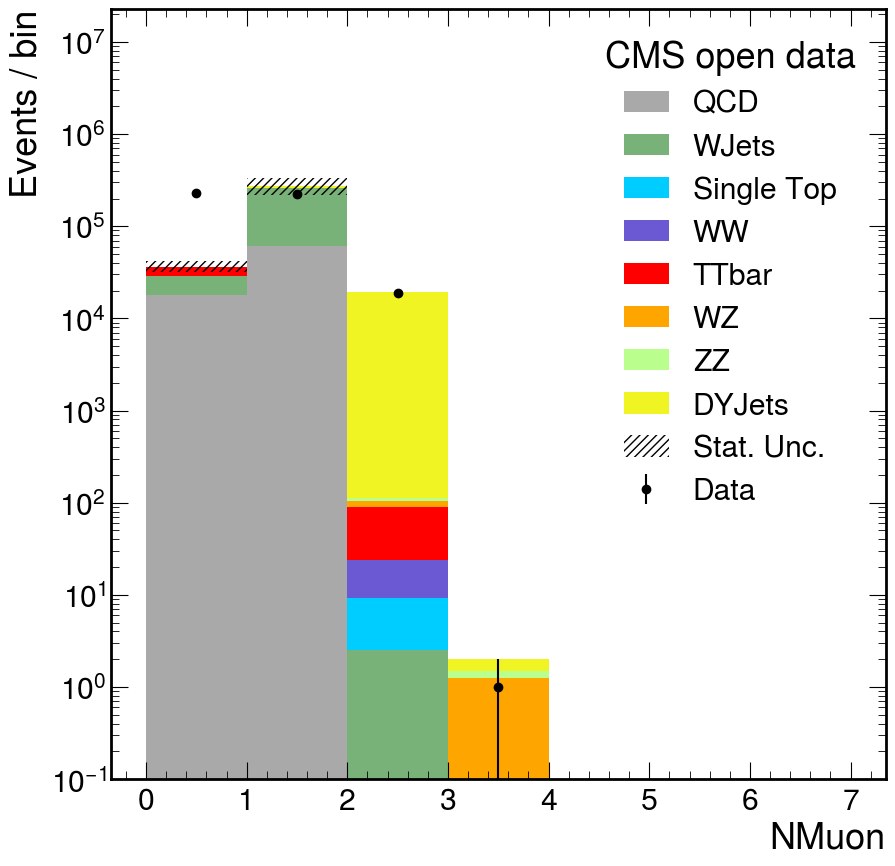

In [16]:
# plot muon multiplicity without any event selection (this is dangerous)
makePlot(dfs, var='NMuon', xmin = 0, xmax = 7, ylog = True, saveFig = False)

In [5]:
# Basic selection: 1 muon, trigger and >=4 jets
sel1_dfs = [] # list to hold the dataframes that pass the selection cuts 1

for df in dfs:

    # read label, color, those attributes get lost after applying selections
    label = df.label
    color = df.color

    # apply selection
    print('applying selection in %s'%label)
    selection = (df.NJet >= 4) & (df.NMuon == 1) & (df.triggerIsoMu24 == 1)
    df  = df[ selection ]   # selection

    # attach back label, color attributes to the new data frame
    df.label = label
    df.color = color

    # zero suppress zero-lenght dataframes, after the cuts -- Don't forget this!
    if len(df)>0:
        sel1_dfs += [df]

applying selection in Data
applying selection in QCD
applying selection in WJets
applying selection in Single Top
applying selection in WW
applying selection in TTbar
applying selection in WZ
applying selection in ZZ
applying selection in DYJets


In [ ]:
# example: transform one awkward dataframe (sel1_dfs[0]) to pandas dataframe for illustration
pandas_df = ak.to_pandas(sel1_dfs[0][['NJet','Jet_Px', 'Jet_Py', 'Jet_Pz', 'Jet_E']])
pandas_df.head(20)

NJet     Jet_Px      Jet_Py      Jet_Pz       Jet_E
entry subentry                                                     
0     0            2  26.874516   19.420580  -88.124496   94.497650
      1            2 -30.468102    8.301675   31.600210   44.825829
1     0            4  93.106194  -70.361778  -15.527380  119.411148
      1            4 -71.974525   33.147995   29.188858   85.123077
      2            4 -46.767761    0.867310  -54.201275   72.466415
      3            4 -14.798351   26.899433    2.832270   31.461025
2     0            2  22.600475   35.797512   46.948059   63.915985
      1            2  39.009624   -0.582103 -131.969604  137.726364
3     0            2 -25.107719  -80.528809   30.245373   90.188835
      1            2  29.936176   37.600082  -28.067451   56.152363
4     0            3 -51.936565  -48.015408  -98.979416  122.014214
      1            3  10.798782   31.973427 -159.661804  163.298706
      2            3  21.957951  -25.238266  157.631775  161.289047
5     0            4  85.389725  184.660339   -1.517379  205.852295
      1            4 -15.208774 -168.397629 -247.651932  300.886658
      2            4  33.480453  -10.868163   18.611637   40.463459
      3            4   8.082747   31.946035   95.125404  100.757050
6     0            2  43.726589  -16.913248   18.046703   52.344780
      1            2  25.920780   27.712521  -53.356518   66.072876
7     0            2  16.114429  -32.481033 -109.249695  115.131485

In [ ]:
# example of how to access the variable lenght arrays of sel1_dfs[0]
print(sel1_dfs[0].Jet_Px[0:3])           # first dfs, first 3 events, variable length Jet_Px
print(sel1_dfs[0].Jet_Px[0])             # first dfs, first event, variable length Jet_Px
print(sel1_dfs[0].Jet_Px[1])             # first dfs, second event, variable length Jet_Px
print(sel1_dfs[0].Jet_Px[0:3, 0])        # first dfs, first 3 events, Jet_Px[0]
print(sel1_dfs[0].Jet_Px[:, 1])          # first dfs, all events, Jet_Px[1]
print(sel1_dfs[0].Jet_Px[:, 0])          # first dfs, all events, Jet_Px[0]

[[26.9, -30.5], [93.1, -72, -46.8, -14.8], [22.6, 39]]
[26.9, -30.5]
[93.1, -72, -46.8, -14.8]
[26.9, 93.1, 22.6]
[-30.5, -72, 39, 29.9, 10.8, -15.2, 25.9, ... -35.8, 27.4, 23, 9.54, 1.87, -1.39]
[26.9, 93.1, 22.6, -25.1, -51.9, 85.4, ... -71.9, 41.2, 26.5, 19.8, -70.3, -55.9]


In [ ]:
# Reconstruct the top from three of the leading four jets

rec_tops = {}
for df in sel1_dfs:
    jets = ak.Record({"x": df.Jet_Px,
                      "y": df.Jet_Py,
                      "z": df.Jet_Pz,
                      "E": df.Jet_E,
                      "btag": df.Jet_btag,},
                     with_name="LorentzVector")
    lead_jets = jets[:,:4]
    #Require exactly two of the leading 4 jets are b-tagged
    sel = ak.sum(lead_jets.btag, axis=1) == 2
    lead_jets = lead_jets[sel]
    b_jets = lead_jets[lead_jets.btag]
    light_jets = lead_jets[~lead_jets.btag]
    rec_W = lead_jets[:,0] + lead_jets[:,1]
    top_cands = bjets + rec_W
    #pick the top solution with mass closest to the top mass
    rec_top = top_cands[ak.argmin(abs(top_cands.mass-172.5), axis=1)]
    rec_tops[(df.label, df.color)] = rec_top